### ANALYSE DE DONNEES : UTILISATION DE PANDAS POUR ANALYSER ET VISUALISER DES DONNEES COMPLEXES PROVENANT DE DIFFERENTES SOURCES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve 

from pandas import Series, DataFrame

### 1. Fusionner les fichiers dataset de sources differentes (Dataset_Micro_financexlsx, ds_salaries_2020.csv et ds_salaries_2021.csv). nous allons aussi faire la selection des attribues des données

In [2]:
fd1=pd.read_excel("Dataset_Micro_finance.xlsx")

In [3]:
fd2=pd.read_csv('ds_salaries_2020.csv')

In [4]:
fd3=pd.read_csv('ds_salaries_2021.csv')

In [5]:
data1 = list(fd1.columns[:])

In [6]:
data1

['Individu',
 'Age',
 'Travail_TYPE_Activité',
 'Etat_Civil',
 'Ville_Activité ou Travail',
 'Garantie',
 'Montant',
 'Exam_Demande',
 'Classe à prédire']

In [7]:
data2 = list(fd2.columns[:])
data2

['Unnamed: 0',
 'work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary',
 'salary_currency',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size']

In [8]:
data3 =list(fd3.columns[:])
data3

['Unnamed: 0',
 'work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary',
 'salary_currency',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size']

In [9]:
dfs = pd.concat([fd1, fd2,fd3])

In [10]:
dfs.head(12000)

,Individu,Age,Travail_TYPE_Activité,Etat_Civil,Ville_Activité ou Travail,Garantie,Montant,Exam_Demande,Classe à prédire,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,1.0,54.0,"commerce (vente boissons, vente légumes, bouti...",marié(e),KINSHASA,0.1,2528.0,0.3,Octroi refusé,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,51.0,"commerce (vente boissons, vente légumes, bouti...",marié(e),KINSHASA,0.1,1352.0,0.3,Octroi refusé,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,19.0,"commerce (vente boissons, vente légumes, bouti...",Célibataire,KONGO CENTRAL,0.1,1204.0,0.3,Octroi refusé,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,54.0,"commerce (vente boissons, vente légumes, bouti...",marié(e),KINSHASA,0.1,1969.0,0.3,Octroi refusé,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,59.0,"commerce (vente boissons, vente légumes, bouti...",marié(e),BANDUNDU,0.1,2849.0,0.3,Octroi refusé,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284.0,2021.0,MI,FT,Research Scientist,69999.0,USD,CZ,50.0,CZ,L
213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285.0,2021.0,SE,FT,Data Science Manager,7000000.0,INR,IN,50.0,IN,L
214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286.0,2021.0,SE,FT,Head of Data,87000.0,EUR,SI,100.0,SI,L
215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,287.0,2021.0,MI,FT,Data Scientist,109000.0,USD,US,50.0,US,L


In [11]:
import csv

dfs = "ds_data_new.csv","Dataset_Micro_finance.xlsx"
dfs

('ds_data_new.csv', 'Dataset_Micro_finance.xlsx')

### 2. Conversion variable et Groupement des salaires par job_title et par pays (Nous allons afficher les salaires moyens comme agrégats).

In [12]:
convertion_dict= {'Work_year(NaN)':{1}}
fd2.replace(convertion_dict,inplace=True)

In [13]:
convertion_dict= {'Work_year(NaN)':{1}}
fd3.replace(convertion_dict,inplace=True)

In [14]:
convertion_dict= {'salary(NaN)':{1}}
fd3.replace(convertion_dict,inplace=True)

In [15]:
convertion_dict= {'salary(NaN)':{1}}
fd2.replace(convertion_dict,inplace=True)

In [16]:
convertion_dict= {'Etat_civil(NaN)':{4}}
fd1.replace(convertion_dict,inplace=True)

In [17]:
dfs = pd.concat([fd1, fd2,fd3])

In [18]:
dfs.head(12000)

,Individu,Age,Travail_TYPE_Activité,Etat_Civil,Ville_Activité ou Travail,Garantie,Montant,Exam_Demande,Classe à prédire,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,1.0,54.0,"commerce (vente boissons, vente légumes, bouti...",marié(e),KINSHASA,0.1,2528.0,0.3,Octroi refusé,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,51.0,"commerce (vente boissons, vente légumes, bouti...",marié(e),KINSHASA,0.1,1352.0,0.3,Octroi refusé,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,19.0,"commerce (vente boissons, vente légumes, bouti...",Célibataire,KONGO CENTRAL,0.1,1204.0,0.3,Octroi refusé,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,54.0,"commerce (vente boissons, vente légumes, bouti...",marié(e),KINSHASA,0.1,1969.0,0.3,Octroi refusé,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,59.0,"commerce (vente boissons, vente légumes, bouti...",marié(e),BANDUNDU,0.1,2849.0,0.3,Octroi refusé,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284.0,2021.0,MI,FT,Research Scientist,69999.0,USD,CZ,50.0,CZ,L
213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285.0,2021.0,SE,FT,Data Science Manager,7000000.0,INR,IN,50.0,IN,L
214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286.0,2021.0,SE,FT,Head of Data,87000.0,EUR,SI,100.0,SI,L
215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,287.0,2021.0,MI,FT,Data Scientist,109000.0,USD,US,50.0,US,L


In [19]:
dfs_Job_title=dfs[["job_title","salary"]]
dfs_Job_title.groupby(["job_title"]).mean()

,salary
job_title,
3D Computer Vision Researcher,4.000000e+05
AI Scientist,3.428000e+05
Applied Data Scientist,7.400000e+04
Applied Machine Learning Scientist,2.307000e+05
BI Data Analyst,2.262854e+06
Big Data Architect,1.250000e+05
Big Data Engineer,4.550000e+05
Business Data Analyst,9.500000e+04
Cloud Data Engineer,1.400000e+05


In [20]:
dfs_country=dfs[["employee_residence","salary"]]
dfs_country.groupby(["employee_residence"]).mean()

,salary
employee_residence,
AE,1.150000e+05
AT,7.250000e+04
BE,7.250000e+04
BG,8.000000e+04
BR,7.352000e+04
CA,1.302000e+05
CL,3.040000e+07
CN,2.990000e+05
CO,2.184400e+04


### 3. Nous allons Numériser les données non numériques du dataset  

In [21]:
fd1_copy = fd1.copy()
fd2_copy = fd2.copy()
fd3_copy = fd3.copy()

In [22]:
dfs_copy = dfs.copy()

In [23]:
dfs_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2289 entries, 0 to 216
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Individu                   2000 non-null   float64
 1   Age                        2000 non-null   float64
 2   Travail_TYPE_Activité      2000 non-null   object 
 3   Etat_Civil                 2000 non-null   object 
 4   Ville_Activité ou Travail  2000 non-null   object 
 5   Garantie                   2000 non-null   float64
 6   Montant                    2000 non-null   float64
 7   Exam_Demande               2000 non-null   float64
 8   Classe à prédire           2000 non-null   object 
 9   Unnamed: 0                 289 non-null    float64
 10  work_year                  289 non-null    float64
 11  experience_level           287 non-null    object 
 12  employment_type            286 non-null    object 
 13  job_title                  288 non-null    object

In [24]:
columns_non_numeric = []
for k, v in zip (dfs_copy.columns, dfs_copy.dtypes):
    if v=="object":
        columns_non_numeric.append(k)
columns_non_numeric

['Travail_TYPE_Activité',
 'Etat_Civil',
 'Ville_Activité ou Travail',
 'Classe à prédire',
 'experience_level',
 'employment_type',
 'job_title',
 'salary_currency',
 'employee_residence',
 'company_location',
 'company_size']

In [25]:
maps = {col : {v:k for k,v in enumerate(dfs_copy[col].unique())}
        for col in columns_non_numeric}

In [26]:
for col in columns_non_numeric:
    dfs_copy[col]=dfs_copy[col].map(maps[col])

In [27]:
dfs_copy.head(n=292)

,Individu,Age,Travail_TYPE_Activité,Etat_Civil,Ville_Activité ou Travail,Garantie,Montant,Exam_Demande,Classe à prédire,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,1.0,54.0,0,0,0,0.1,2528.0,0.3,0,NaN,NaN,0,0,0,NaN,0,0,NaN,0,0
1,2.0,51.0,0,0,0,0.1,1352.0,0.3,0,NaN,NaN,0,0,0,NaN,0,0,NaN,0,0
2,3.0,19.0,0,1,1,0.1,1204.0,0.3,0,NaN,NaN,0,0,0,NaN,0,0,NaN,0,0
3,4.0,54.0,0,0,0,0.1,1969.0,0.3,0,NaN,NaN,0,0,0,NaN,0,0,NaN,0,0
4,5.0,59.0,0,0,2,0.1,2849.0,0.3,0,NaN,NaN,0,0,0,NaN,0,0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,288.0,59.0,4,0,2,0.2,1616.0,0.4,1,NaN,NaN,0,0,0,NaN,0,0,NaN,0,0
288,289.0,43.0,4,0,2,0.2,2115.0,0.4,1,NaN,NaN,0,0,0,NaN,0,0,NaN,0,0
289,290.0,19.0,4,1,2,0.2,1141.0,0.4,1,NaN,NaN,0,0,0,NaN,0,0,NaN,0,0
290,291.0,65.0,4,0,2,0.2,1139.0,0.4,1,NaN,NaN,0,0,0,NaN,0,0,NaN,0,0


### 4. Visualisation de l'histogramme de chaque colonne de ce dataset.

In [28]:
dfs_copy.columns

Index(['Individu', 'Age', 'Travail_TYPE_Activité', 'Etat_Civil',
       'Ville_Activité ou Travail', 'Garantie', 'Montant', 'Exam_Demande',
       'Classe à prédire', 'Unnamed: 0', 'work_year', 'experience_level',
       'employment_type', 'job_title', 'salary', 'salary_currency',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

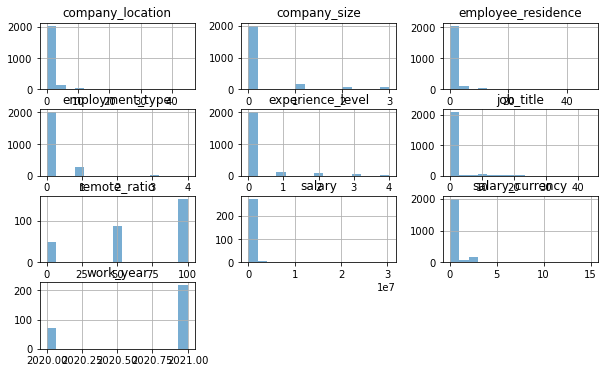

In [29]:
dfs_copy [['work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size']].hist(bins=15, figsize=(10, 6), alpha=0.6)

plt.show()

### 5. Pour chaque colonne, on determine la moyenne, la médiane et le mode.

In [30]:
dfs_copy.iloc[:,0:11].apply(np.mean)

Individu                     1000.500000
Age                            41.345000
Travail_TYPE_Activité           3.989952
Etat_Civil                      0.426824
Ville_Activité ou Travail       1.336828
Garantie                        0.180000
Montant                      1642.148000
Exam_Demande                    0.331800
Classe à prédire                0.530363
Unnamed: 0                    144.000000
work_year                    2020.750865
dtype: float64

In [31]:
dfs_copy.iloc[:,0:11].apply(np.median)

Individu                     NaN
Age                          NaN
Travail_TYPE_Activité        4.0
Etat_Civil                   0.0
Ville_Activité ou Travail    1.0
Garantie                     NaN
Montant                      NaN
Exam_Demande                 NaN
Classe à prédire             0.0
Unnamed: 0                   NaN
work_year                    NaN
dtype: float64

In [32]:
dfs_copy.round(2).mode()

,Individu,Age,Travail_TYPE_Activité,Etat_Civil,Ville_Activité ou Travail,Garantie,Montant,Exam_Demande,Classe à prédire,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,1.0,24.0,0.0,0.0,0.0,0.1,1895.0,0.3,0.0,0.0,2021.0,0.0,0.0,0.0,80000.0,0.0,0.0,100.0,0.0,0.0
1,2.0,NaN,NaN,NaN,NaN,NaN,2793.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,1997.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,1998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,1999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
dfs_copy.columns

Index(['Individu', 'Age', 'Travail_TYPE_Activité', 'Etat_Civil',
       'Ville_Activité ou Travail', 'Garantie', 'Montant', 'Exam_Demande',
       'Classe à prédire', 'Unnamed: 0', 'work_year', 'experience_level',
       'employment_type', 'job_title', 'salary', 'salary_currency',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [34]:
dfs_copy["salary_in_usd"] = dfs_copy["salary"]
dfs_copy.head(10)

,Individu,Age,Travail_TYPE_Activité,Etat_Civil,Ville_Activité ou Travail,Garantie,Montant,Exam_Demande,Classe à prédire,Unnamed: 0,...,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size,salary_in_usd
0,1.0,54.0,0,0,0,0.1,2528.0,0.3,0,NaN,...,0,0,0,NaN,0,0,NaN,0,0,NaN
1,2.0,51.0,0,0,0,0.1,1352.0,0.3,0,NaN,...,0,0,0,NaN,0,0,NaN,0,0,NaN
2,3.0,19.0,0,1,1,0.1,1204.0,0.3,0,NaN,...,0,0,0,NaN,0,0,NaN,0,0,NaN
3,4.0,54.0,0,0,0,0.1,1969.0,0.3,0,NaN,...,0,0,0,NaN,0,0,NaN,0,0,NaN
4,5.0,59.0,0,0,2,0.1,2849.0,0.3,0,NaN,...,0,0,0,NaN,0,0,NaN,0,0,NaN
5,6.0,29.0,0,0,2,0.1,865.0,0.3,0,NaN,...,0,0,0,NaN,0,0,NaN,0,0,NaN
6,7.0,29.0,0,0,0,0.1,2708.0,0.3,0,NaN,...,0,0,0,NaN,0,0,NaN,0,0,NaN
7,8.0,32.0,0,0,3,0.1,392.0,0.3,0,NaN,...,0,0,0,NaN,0,0,NaN,0,0,NaN
8,9.0,29.0,0,0,0,0.1,486.0,0.3,0,NaN,...,0,0,0,NaN,0,0,NaN,0,0,NaN
9,10.0,58.0,0,0,1,0.1,1669.0,0.3,0,NaN,...,0,0,0,NaN,0,0,NaN,0,0,NaN


In [35]:
dfs_copy.describe()

,Individu,Age,Travail_TYPE_Activité,Etat_Civil,Ville_Activité ou Travail,Garantie,Montant,Exam_Demande,Classe à prédire,Unnamed: 0,...,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size,salary_in_usd
count,2000.000000,2000.000000,2289.000000,2289.000000,2289.000000,2000.0000,2000.000000,2000.000000,2289.000000,289.000000,...,2289.000000,2289.000000,2289.000000,2.870000e+02,2289.000000,2289.000000,289.000000,2289.000000,2289.000000,2.870000e+02
mean,1000.500000,41.345000,3.989952,0.426824,1.336828,0.1800,1642.148000,0.331800,0.530363,144.000000,...,0.238969,0.137615,1.463958,5.089017e+05,0.363914,1.431630,67.993080,1.256881,0.215378,5.089017e+05
std,577.494589,13.930147,3.198337,0.705248,1.340485,0.0872,781.061034,0.046582,0.708385,83.571327,...,0.708430,0.398671,5.392840,2.199026e+06,1.364488,5.421062,37.796788,4.843935,0.637144,2.199026e+06
min,1.000000,18.000000,0.000000,0.000000,0.000000,0.1000,300.000000,0.300000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+03
25%,500.750000,29.000000,1.000000,0.000000,0.000000,0.1000,948.500000,0.300000,0.000000,72.000000,...,0.000000,0.000000,0.000000,5.950000e+04,0.000000,0.000000,50.000000,0.000000,0.000000,5.950000e+04
50%,1000.500000,41.000000,4.000000,0.000000,1.000000,0.2000,1656.500000,0.300000,0.000000,144.000000,...,0.000000,0.000000,0.000000,1.000000e+05,0.000000,0.000000,100.000000,0.000000,0.000000,1.000000e+05
75%,1500.250000,53.250000,6.000000,1.000000,2.000000,0.2000,2324.000000,0.400000,1.000000,216.000000,...,0.000000,0.000000,0.000000,1.720000e+05,0.000000,0.000000,100.000000,0.000000,0.000000,1.720000e+05
max,2000.000000,65.000000,9.000000,2.000000,4.000000,0.4000,3000.000000,0.400000,2.000000,288.000000,...,4.000000,4.000000,44.000000,3.040000e+07,15.000000,48.000000,100.000000,45.000000,3.000000,3.040000e+07


In [36]:
dfs_copy.salary_in_usd.max()

30400000.0

In [37]:
dfs_copy.salary_in_usd.max()*(3/4)

22800000.0

In [38]:
dfs_copy.salary_in_usd.max()*(1/2)

15200000.0

In [39]:
dfs_copy_salarymax = dfs_copy['salary_in_usd'].max()
dfs_copy_salarymax
High = dfs_copy_salarymax*(3/4)
low = dfs_copy_salarymax*(1/2)

In [40]:
conditionlist = [
(dfs_copy['salary_in_usd'] >=(22800000)),
(dfs_copy['salary_in_usd'] > 15200000 & (dfs_copy["salary_in_usd"]< 22800000)),
(dfs_copy['salary_in_usd'] < 15200000),
    
    ]

choicelist = ['high','normal','low']

dfs_copy['salary_category']=np.select(conditionlist, choicelist, default='Not specified')


In [41]:
dfs_copy.loc[dfs_copy["salary"] < 300000, "salary_category"] = "low"

### 6. ici nous avons d'écrit les caractéristiques de chaque groupe des salaires

In [42]:
high = dfs_copy.salary_category=="high"
Normal = dfs_copy.salary_category=="normal"
low = dfs_copy.salary_category=="low"

dfs_high = dfs_copy.loc [high, "salary_category"]
dfs_Normal = dfs_copy.loc [Normal, "salary_category"]
dfs_low = dfs_copy.loc [low, "salary_category"]

In [43]:
dfs_copy.head(180)

,Individu,Age,Travail_TYPE_Activité,Etat_Civil,Ville_Activité ou Travail,Garantie,Montant,Exam_Demande,Classe à prédire,Unnamed: 0,...,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size,salary_in_usd,salary_category
0,1.0,54.0,0,0,0,0.1,2528.0,0.3,0,NaN,...,0,0,NaN,0,0,NaN,0,0,NaN,Not specified
1,2.0,51.0,0,0,0,0.1,1352.0,0.3,0,NaN,...,0,0,NaN,0,0,NaN,0,0,NaN,Not specified
2,3.0,19.0,0,1,1,0.1,1204.0,0.3,0,NaN,...,0,0,NaN,0,0,NaN,0,0,NaN,Not specified
3,4.0,54.0,0,0,0,0.1,1969.0,0.3,0,NaN,...,0,0,NaN,0,0,NaN,0,0,NaN,Not specified
4,5.0,59.0,0,0,2,0.1,2849.0,0.3,0,NaN,...,0,0,NaN,0,0,NaN,0,0,NaN,Not specified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176.0,25.0,2,1,0,0.1,2374.0,0.4,1,NaN,...,0,0,NaN,0,0,NaN,0,0,NaN,Not specified
176,177.0,43.0,2,0,0,0.1,1954.0,0.4,1,NaN,...,0,0,NaN,0,0,NaN,0,0,NaN,Not specified
177,178.0,18.0,2,1,0,0.1,763.0,0.4,1,NaN,...,0,0,NaN,0,0,NaN,0,0,NaN,Not specified
178,179.0,29.0,2,0,0,0.1,330.0,0.4,1,NaN,...,0,0,NaN,0,0,NaN,0,0,NaN,Not specified


In [44]:
dfs_low.describe()

count     249
unique      1
top       low
freq      249
Name: salary_category, dtype: object

In [45]:
dfs_copy.salary.max()

30400000.0

In [46]:
dfs_copy.salary_category.describe()

count              2289
unique                4
top       Not specified
freq               2002
Name: salary_category, dtype: object

In [47]:
dfs_copy.nunique()

Individu                     2000
Age                            48
Travail_TYPE_Activité          10
Etat_Civil                      3
Ville_Activité ou Travail       5
Garantie                        4
Montant                      1414
Exam_Demande                    2
Classe à prédire                3
Unnamed: 0                    289
work_year                       2
experience_level                5
employment_type                 5
job_title                      45
salary                        153
salary_currency                16
employee_residence             49
remote_ratio                    3
company_location               46
company_size                    4
salary_in_usd                 153
salary_category                 4
dtype: int64

 ### 7. Déscription les caractéristiques de chaque groupe de salaire

In [48]:
dfs_high.describe()

count        1
unique       1
top       high
freq         1
Name: salary_category, dtype: object

In [49]:
dfs_Normal.describe()

count         37
unique         1
top       normal
freq          37
Name: salary_category, dtype: object

In [50]:
dfs_low.describe()

count     249
unique      1
top       low
freq      249
Name: salary_category, dtype: object

 ### 8. ici nous avons Supprimer les colonnes moins importantes.

In [51]:
dfs_copy.columns

Index(['Individu', 'Age', 'Travail_TYPE_Activité', 'Etat_Civil',
       'Ville_Activité ou Travail', 'Garantie', 'Montant', 'Exam_Demande',
       'Classe à prédire', 'Unnamed: 0', 'work_year', 'experience_level',
       'employment_type', 'job_title', 'salary', 'salary_currency',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size', 'salary_in_usd', 'salary_category'],
      dtype='object')

In [52]:
dfs_copy= dfs_copy.drop (['experience_level','salary_currency','remote_ratio','company_location','company_size'], axis=1)
dfs_copy.head()

,Individu,Age,Travail_TYPE_Activité,Etat_Civil,Ville_Activité ou Travail,Garantie,Montant,Exam_Demande,Classe à prédire,Unnamed: 0,work_year,employment_type,job_title,salary,employee_residence,salary_in_usd,salary_category
0,1.0,54.0,0,0,0,0.1,2528.0,0.3,0,NaN,NaN,0,0,NaN,0,NaN,Not specified
1,2.0,51.0,0,0,0,0.1,1352.0,0.3,0,NaN,NaN,0,0,NaN,0,NaN,Not specified
2,3.0,19.0,0,1,1,0.1,1204.0,0.3,0,NaN,NaN,0,0,NaN,0,NaN,Not specified
3,4.0,54.0,0,0,0,0.1,1969.0,0.3,0,NaN,NaN,0,0,NaN,0,NaN,Not specified
4,5.0,59.0,0,0,2,0.1,2849.0,0.3,0,NaN,NaN,0,0,NaN,0,NaN,Not specified


In [53]:
Convertion_dict={'salary_category':{'low':0,'normal':1,'high':2,'Not specified':3}}
dfs_copy.replace(Convertion_dict, inplace=True)
dfs_copy.head(100)

,Individu,Age,Travail_TYPE_Activité,Etat_Civil,Ville_Activité ou Travail,Garantie,Montant,Exam_Demande,Classe à prédire,Unnamed: 0,work_year,employment_type,job_title,salary,employee_residence,salary_in_usd,salary_category
0,1.0,54.0,0,0,0,0.1,2528.0,0.3,0,NaN,NaN,0,0,NaN,0,NaN,3
1,2.0,51.0,0,0,0,0.1,1352.0,0.3,0,NaN,NaN,0,0,NaN,0,NaN,3
2,3.0,19.0,0,1,1,0.1,1204.0,0.3,0,NaN,NaN,0,0,NaN,0,NaN,3
3,4.0,54.0,0,0,0,0.1,1969.0,0.3,0,NaN,NaN,0,0,NaN,0,NaN,3
4,5.0,59.0,0,0,2,0.1,2849.0,0.3,0,NaN,NaN,0,0,NaN,0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96.0,34.0,0,0,3,0.1,1339.0,0.3,0,NaN,NaN,0,0,NaN,0,NaN,3
96,97.0,25.0,0,1,0,0.1,2790.0,0.3,0,NaN,NaN,0,0,NaN,0,NaN,3
97,98.0,64.0,0,0,0,0.1,759.0,0.3,0,NaN,NaN,0,0,NaN,0,NaN,3
98,99.0,54.0,0,0,0,0.1,1710.0,0.3,0,NaN,NaN,0,0,NaN,0,NaN,3


In [56]:
dfs_copy.head(100)

,Individu,Age,Travail_TYPE_Activité,Etat_Civil,Ville_Activité ou Travail,Garantie,Montant,Exam_Demande,Classe à prédire,Unnamed: 0,work_year,employment_type,job_title,salary,employee_residence,salary_in_usd,salary_category
0,1.0,54.0,0,0,0,0.1,2528.0,0.3,0,NaN,NaN,0,0,NaN,0,NaN,3
1,2.0,51.0,0,0,0,0.1,1352.0,0.3,0,NaN,NaN,0,0,NaN,0,NaN,3
2,3.0,19.0,0,1,1,0.1,1204.0,0.3,0,NaN,NaN,0,0,NaN,0,NaN,3
3,4.0,54.0,0,0,0,0.1,1969.0,0.3,0,NaN,NaN,0,0,NaN,0,NaN,3
4,5.0,59.0,0,0,2,0.1,2849.0,0.3,0,NaN,NaN,0,0,NaN,0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96.0,34.0,0,0,3,0.1,1339.0,0.3,0,NaN,NaN,0,0,NaN,0,NaN,3
96,97.0,25.0,0,1,0,0.1,2790.0,0.3,0,NaN,NaN,0,0,NaN,0,NaN,3
97,98.0,64.0,0,0,0,0.1,759.0,0.3,0,NaN,NaN,0,0,NaN,0,NaN,3
98,99.0,54.0,0,0,0,0.1,1710.0,0.3,0,NaN,NaN,0,0,NaN,0,NaN,3


### 9. ici on Visualise en clusters ces données sur 3d.

In [57]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [64]:
y = dfs_copy.salary_category.values
X_dfs_copy = dfs_copy.drop(columns=["salary_category","job_title"]).values

In [66]:
dfs_copy=dfs_copy.dropna(axis=0)

In [60]:
y

array([3, 3, 3, ..., 0, 0, 0], dtype=int64)

In [62]:
y_high = y == 0
y_normal = y== 1
y_low = y ==2
y_low

pca_3d = PCA(n_components=3)
X_dfs_copy_3d = pca_3d.fit_transform(X_dfs_copy)

X_dfs_copy_3d.shape


array([False, False, False, ..., False, False, False])

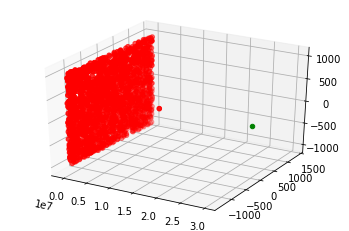

In [66]:
ax = plt.axes(projection='3d')
ax.scatter3D(X_dfs_copy_3d[y_high, 0], X_dfs_copy_3d[y_high, 1],
X_dfs_copy_3d[y_high, 2], color='red')
ax.scatter3D(X_dfs_copy_3d[y_normal, 0], X_dfs_copy_3d[y_normal, 1],
X_dfs_copy_3d[y_normal, 2], color='green')
ax.scatter3D(X_dfs_copy_3d[y_low, 0], X_dfs_copy_3d[y_low, 1],
X_dfs_copy_3d[y_low, 2], color='green')

### 10. Identification les colonnes les plus corrélées.

In [67]:
dfs_copy.corr()>=0.75

,Individu,Age,Travail_TYPE_Activité,Etat_Civil,Ville_Activité ou Travail,Garantie,Montant,Exam_Demande,Classe à prédire,Unnamed: 0,work_year,employment_type,job_title,salary,employee_residence,salary_category
Individu,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Age,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Travail_TYPE_Activité,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
Etat_Civil,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
Ville_Activité ou Travail,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
Garantie,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
Montant,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
Exam_Demande,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
Classe à prédire,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
Unnamed: 0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


### commentaire : Il existe une forte correlation entre la variable Exam_dem, work_year et unnamed:0. les restes des variables ne sont pas correlées

### 11. Développement un modèle prédictif (une régression) afin de prévoir le salaire d’une catégorie

In [68]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neural_network import MLPClassifier

In [70]:
X_dfs_copy_3d.shape

(2289, 3)

In [71]:
lin_okay = LinearRegression()

In [72]:
X_train, X_test, y_train, y_test= train_test_split(X_dfs_copy, y, test_size=0.3)

In [73]:
lin_okay.fit(X_train, y_train)

LinearRegression()

In [74]:
y_pred_train = lin_okay.predict(X_train)

In [75]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [76]:
print (y_pred_train)

[ 4.29878355e-13  4.29878355e-13  4.29878355e-13 ... -1.50327968e-02
  4.26325641e-13  4.33431069e-13]


In [77]:
variables=list(dfs_copy.columns[:7])

In [78]:
X=dfs_copy[variables]

In [82]:
Y=dfs_copy['salary'].value_counts("job_title"==0)
Y

5.089017e+05    2002
8.000000e+04       9
1.000000e+05       8
1.500000e+05       7
1.100000e+05       7
                ... 
3.700000e+04       1
4.900000e+06       1
1.200000e+06       1
8.760000e+03       1
2.990000e+05       1
Name: salary, Length: 154, dtype: int64